# Roller Coaster

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data
wood_rcoaster = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
steel_rcoaster = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

print(wood_rcoaster.head())
print(steel_rcoaster.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

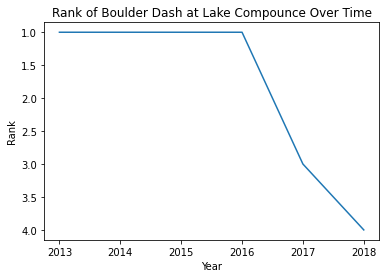

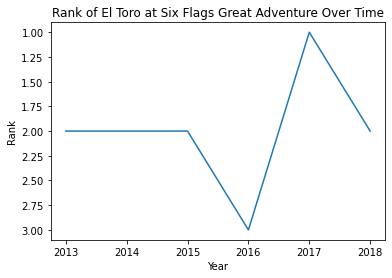

In [2]:
# Create a function to plot rankings over time for 1 roller coaster
def rcoaster_rank_vs_time(name, park, dataframe):
    rank = dataframe.Rank[(dataframe.Name== name) & (dataframe.Park == park) ]
    year = dataframe['Year of Rank'][(dataframe.Name == name) & (dataframe.Park == park)]
    plt.plot(year, rank)
    plt.title('Rank of ' + name + ' at '+ park + ' Over Time')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    ax= plt.subplot()
    ax.invert_yaxis()
    plt.show()


# Create a plot of El Toro ranking over time
rcoaster_rank_vs_time('Boulder Dash','Lake Compounce', wood_rcoaster )
rcoaster_rank_vs_time('El Toro','Six Flags Great Adventure', wood_rcoaster )

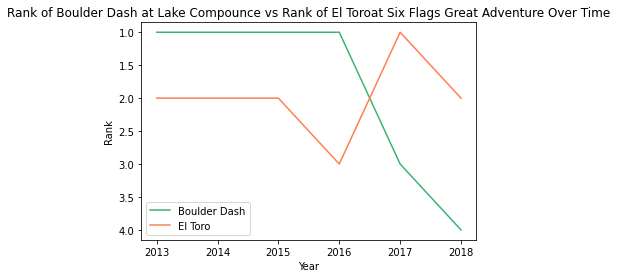

In [9]:
# Create a function to plot rankings over time for 2 roller coasters
def rcoaster_rank_vs_time_2(name1, park1,name2, park2, dataframe):
    rank1 = dataframe.Rank[(dataframe.Name== name1) & (dataframe.Park == park1) ]
    year1 = dataframe['Year of Rank'][(dataframe.Name == name1) & (dataframe.Park == park1)]
    rank2 = dataframe.Rank[(dataframe.Name== name2) & (dataframe.Park == park2) ]
    year2 = dataframe['Year of Rank'][(dataframe.Name == name2) & (dataframe.Park == park2)]
    plt.plot(year1, rank1, color = 'mediumseagreen')
    plt.plot(year2, rank2, color = 'coral')
    plt.title('Rank of ' + name1 + ' at '+ park1 + ' vs Rank of '+ name2 + 'at ' + park2 + ' Over Time')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    ax= plt.subplot()
    ax.invert_yaxis()
    plt.legend([name1, name2])
    plt.show()
# Create a plot of El Toro and Boulder Dash roller coasters
rcoaster_rank_vs_time_2('Boulder Dash','Lake Compounce', 'El Toro','Six Flags Great Adventure', wood_rcoaster)

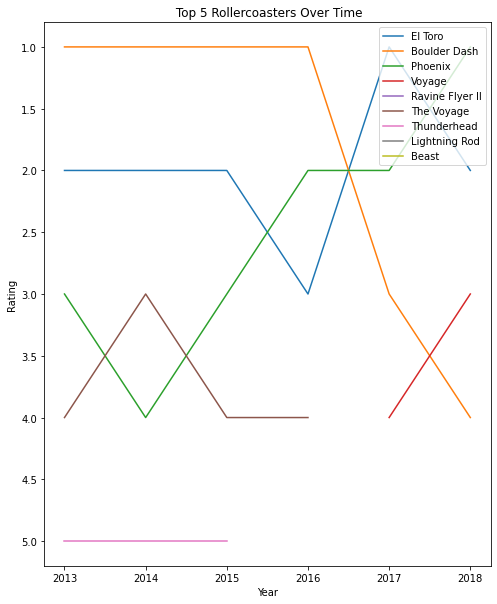

In [3]:
# Create a function to plot top n rankings over time
def top_n(n, dataframe):
    plt.figure(figsize = (8,10))
    top_n_rankings = dataframe[dataframe['Rank'] <= n]
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax= plt.subplot()
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
        plt.legend(loc = 1)
        plt.xlabel('Year')
        plt.ylabel('Rating')
        plt.title(' Top '+ str(n) + ' Rollercoasters Over Time')
        ax.invert_yaxis()
# Create a plot of top n rankings over time
top_n(5, wood_rcoaster )

In [4]:
# load roller coaster data
rcoaster = pd.read_csv('roller_coasters.csv')
print(rcoaster.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


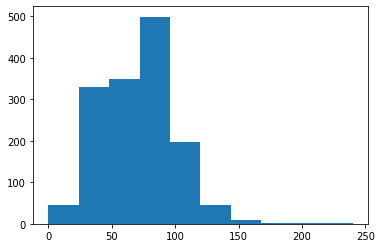

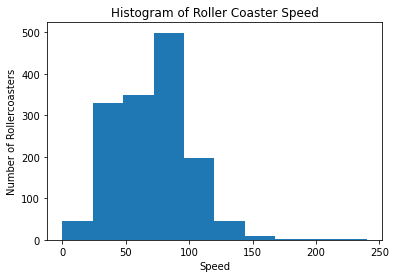

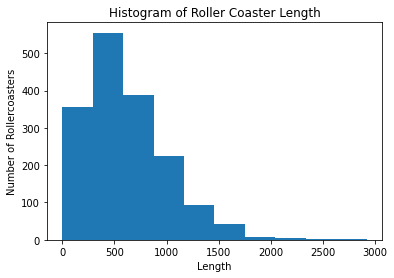

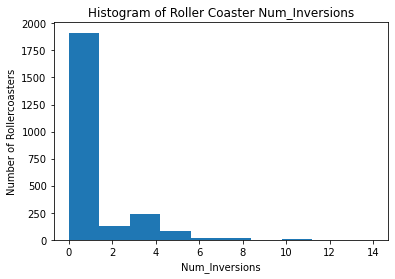

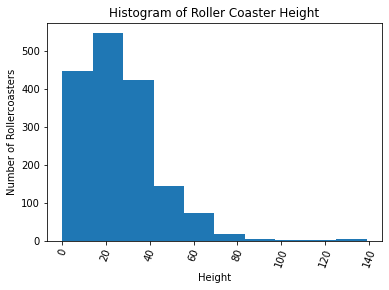

In [5]:
# Create a function to plot histogram of column values
def col_hist(column, dataframe):
    plt.hist(dataframe[column].dropna())
    plt.title('Histogram of Roller Coaster '+ column.title())
    plt.xlabel(column.title())
    plt.ylabel('Number of Rollercoasters')
    plt.show()
    
plt.hist(rcoaster['speed'])
plt.show()
# Create histogram of roller coaster speed
col_hist('speed', rcoaster)
# Create histogram of roller coaster length
col_hist('length', rcoaster)
# Create histogram of roller coaster number of inversions
col_hist('num_inversions', rcoaster)
# Create a function to plot histogram of height values


def height_hist(dataframe):
    heights = dataframe[dataframe['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Number of Rollercoasters')
    ax = plt.subplot()
    plt.xticks(rotation=70)
    plt.show()
    
   
  
    
# Create a histogram of roller coaster height
height_hist(rcoaster)

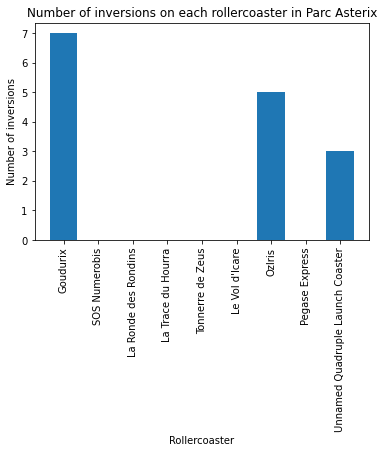

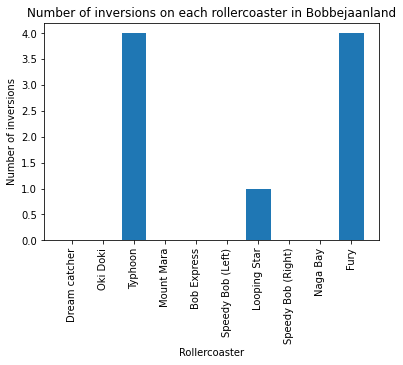

In [6]:
# Create a function to plot inversions by coaster at park
def inversion_park(park, dataframe):
    inversions = dataframe.num_inversions[dataframe['park']==park]
    coasters = dataframe.name[dataframe['park']==park]
    plt.bar(coasters, inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coasters)))
    ax.set_xticklabels(coasters, rotation = 90)
    plt.title('Number of inversions on each rollercoaster in ' + park.title())
    plt.xlabel('Rollercoaster')
    plt.ylabel('Number of inversions')
    plt.show()
# Create barplot of inversions by roller coasters
inversion_park('Parc Asterix', rcoaster)
inversion_park('Bobbejaanland', rcoaster)

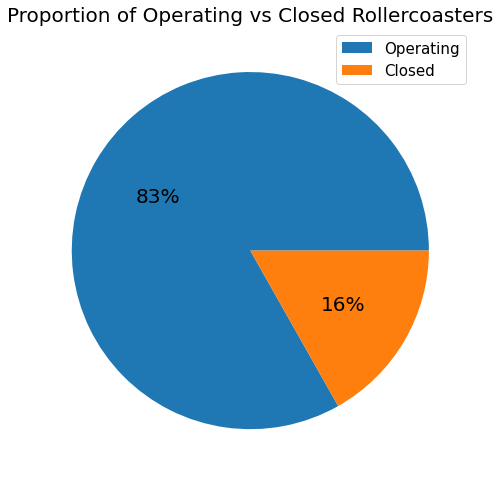

In [7]:
# Create a function to plot a pie chart of status.operating
def status_pie(dataframe):
    operating_coasters = dataframe[dataframe['status'] == 'status.operating']
    closed_coasters = dataframe[dataframe['status'] == 'status.closed.definitely']
    num_operating = len(operating_coasters)
    num_closed = len(closed_coasters)
    plt.figure(figsize = (8,10))
    plt.pie([num_operating, num_closed], autopct = '%d%%', textprops = {'fontsize': 20})
    plt.legend(['Operating', 'Closed'], fontsize = 15)
    plt.title('Proportion of Operating vs Closed Rollercoasters', fontsize = 20)
    plt.show()
    
    
# Create pie chart of roller coasters
status_pie(rcoaster)


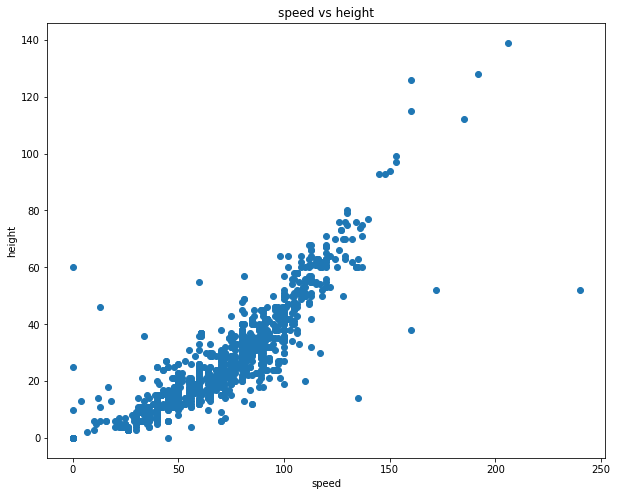

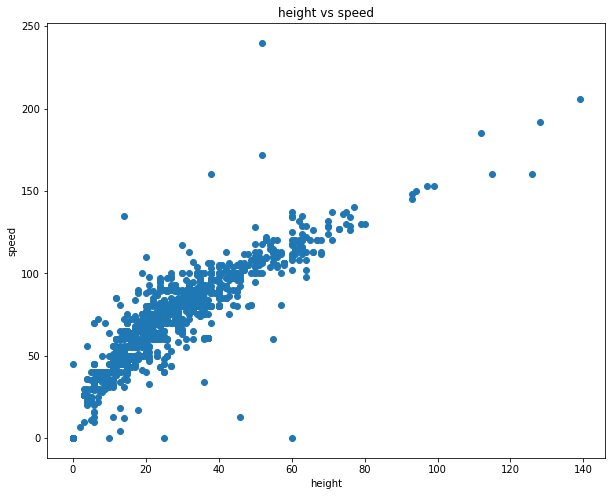

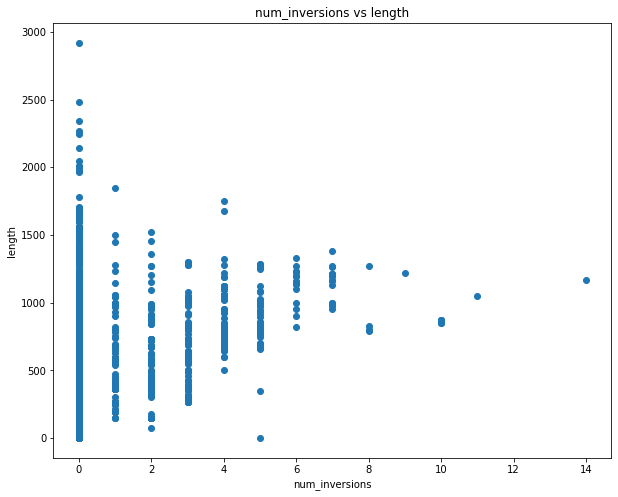

Columns must contain numerical data, please change column 2.


In [8]:
# Create a function to plot scatter of any two columns
def rcoaster_scatter(column1, column2, dataframe):
    if ((dataframe[column1].dtype == float) or (dataframe[column1].dtype == int)):
        if ((dataframe[column2].dtype == float) or (dataframe[column2].dtype == int)):
            if (column1 == 'height') or (column2 == 'height'):
                dataframe = dataframe[dataframe['height'] < 140]
            plt.figure(figsize=(10,8))
            var1 = dataframe[column1]
            var2 = dataframe[column2]
            plt.scatter(var1, var2)
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.title(column1 + ' vs '+ column2)
            plt.show()
        else:
            print('Columns must contain numerical data, please change column 2.')
    else:
        print('Columns must contain numerical data, please change column 1.')
    
# Create a function to plot scatter of speed vs height
rcoaster_scatter('speed', 'height', rcoaster)


# Create a scatter plot of roller coaster height by speed
rcoaster_scatter('height', 'speed', rcoaster)

rcoaster_scatter('num_inversions', 'length', rcoaster)
rcoaster_scatter('num_inversions', 'park', rcoaster)